In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = np.loadtxt('data.csv', delimiter=',', skiprows=1)
X = data[:, [0, 1]]
y = data[:, 2]
#Bu veri seti, müşterilerin Age ve Salary bilgilerini içeren özellik sütunlarını barındırır.
#Amaç, bu bilgilere dayanarak bir müşterinin reklamı yapılan ürünü satın alıp almadığını
#('Purchased' sütunu, 1=Satın Aldı, 0=Satın Almadı) tahmin etmektir.

In [66]:
X[:5]

array([[19., 19.],
       [35., 20.],
       [26., 43.],
       [27., 57.],
       [19., 76.]])

In [67]:
y[:5]

array([0., 0., 0., 0., 0.])

In [101]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def costFunctionReg(theta, X, y, lam):
    h = sigmoid(np.dot(X, theta))
    t = np.zeros(len(theta))
    t[1:] = theta[1:]

    eps = 1e-12  # log(0) engelle
    J = (-(np.dot(y, np.log(h + eps)) + np.dot(1 - y, np.log(1 - h + eps))) / X.shape[0]
         + lam * np.dot(t, t) / (2 * X.shape[0]))
    grad = np.dot(X.T, (h - y)) / X.shape[0] + lam * t / X.shape[0]
    return J, grad


def gradientDescent(X, y, theta, alpha, lam, num_iters):
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        J, grad = costFunctionReg(theta, X, y, lam)
        theta = theta - alpha * grad
        if not np.all(np.isfinite(theta)):
            print(f"Theta overflow at iteration {i}")
            break
        J_history[i] = J
    return theta, J_history


def mapFeature(X1, X2):
    degree = 6
    out = np.ones((X1.shape[0], 1))
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out = np.hstack((out, (X1 ** (i - j) * X2 ** j)[:, np.newaxis]))
    return out


def predict(theta, X):
    X_train = mapFeature(X[:, 0], X[:, 1])
    prob = sigmoid(np.dot(X_train, theta))
    return (prob >= 0.5).astype(int)

In [102]:
mu = X.mean(axis=0)
sigma = X.std(axis=0)
X_scaled = (X - mu) / sigma
X_train = mapFeature(X_scaled[:,0], X_scaled[:,1])
theta0 = np.zeros(X_train.shape[1]) 

In [103]:
lam = 1
alpha = 0.1
iter_list = [1000, 5000, 20000]
num_iters = 5000
theta, J_history = gradientDescent(X_train, y, theta0, alpha, lam, num_iters)

thetas_by_iter = {}
Jhist_by_iter = {}

for iters in iter_list:
    theta0 = np.zeros(X_train.shape[1])
    theta_learned, J_history = gradientDescent(X_train, y, theta0, alpha, lam, iters)
    thetas_by_iter[iters] = theta_learned
    Jhist_by_iter[iters] = J_history
    print(f"iters={iters:<6d} min(J)={J_history.min():.6f} last(J)={J_history[-1]:.6f}")

best_iters = min(iter_list, key=lambda k: Jhist_by_iter[k][-1])
theta_best = thetas_by_iter[best_iters]


iters=1000   min(J)=0.246728 last(J)=0.252120
iters=5000   min(J)=0.238702 last(J)=0.246529
iters=20000  min(J)=0.237223 last(J)=0.274180


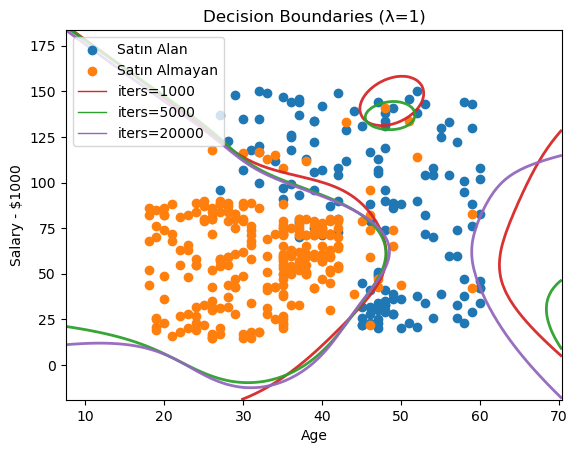

In [123]:
x1, x2 = X_scaled[:, 0], X_scaled[:, 1]
xx, yy = np.meshgrid(np.arange(x1.min()-1, x1.max()+1, 0.05), np.arange(x2.min()-1, x2.max()+1, 0.05))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_m = mapFeature(grid[:, 0], grid[:, 1])

plt.figure()
plt.scatter(X[y==1, 0], X[y==1, 1], label="Satın Alan")
plt.scatter(X[y==0, 0], X[y==0, 1], label="Satın Almayan")

colors = ("tab:red","tab:green","tab:purple")
proxies, labels = [], []

for color, iters in zip(colors, iter_list):

    Z = (grid_m @ thetas_by_iter[iters]).reshape(xx.shape)
    xx_orig = (xx * sigma[0]) + mu[0]
    yy_orig = (yy * sigma[1]) + mu[1]
    plt.contour(xx_orig, yy_orig, Z, levels=[0], colors=[color], linewidths=2, alpha=0.95)
    
    proxies.append(Line2D([0],[0], color=color, lw=1))
    labels.append(f"iters={iters}")

plt.xlabel("Age")
plt.ylabel("Salary - $1000")
plt.title(f"Decision Boundaries (λ={lam})")

h_scatter, l_scatter = plt.gca().get_legend_handles_labels()
plt.legend(h_scatter + proxies, l_scatter + labels, loc="best")
plt.show()

In [125]:
lambdas = [0.0, 0.01, 0.1, 1.0, 10.0]

thetas_by_lambda = {}
Jhist_by_lambda = {}

for lam2 in lambdas:
    theta0 = np.zeros(X_train.shape[1])
    theta_l, J_hist_l = gradientDescent(X_train, y, theta0, alpha, lam2, best_iters)
    thetas_by_lambda[lam2] = theta_l
    Jhist_by_lambda[lam2] = J_hist_l


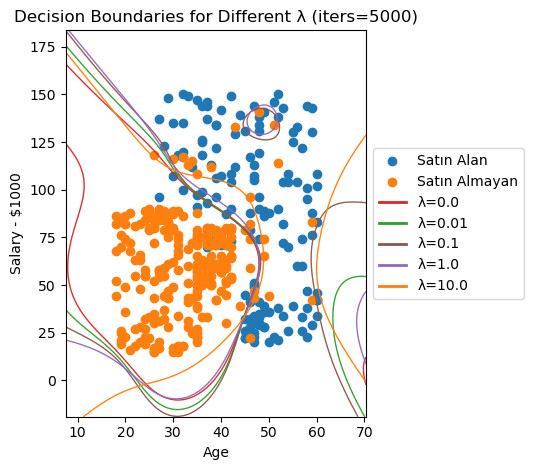

In [126]:
x1, x2 = X_scaled[:, 0], X_scaled[:, 1]
xx, yy = np.meshgrid(np.arange(x1.min()-1, x1.max()+1, 0.05),
                     np.arange(x2.min()-1, x2.max()+1, 0.05))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_m = mapFeature(grid[:, 0], grid[:, 1])

plt.figure()
plt.scatter(X[y==1, 0], X[y==1, 1], label="Satın Alan")
plt.scatter(X[y==0, 0], X[y==0, 1], label="Satın Almayan")

from matplotlib.lines import Line2D
proxies, labels = [], []
colors = ["tab:red", "tab:green", "tab:brown", "tab:purple", "tab:orange"]

for color, lam2 in zip(colors, lambdas):
    Z = (grid_m @ thetas_by_lambda[lam2]).reshape(xx.shape)
    
    xx_orig = (xx * sigma[0]) + mu[0]
    yy_orig = (yy * sigma[1]) + mu[1]

    plt.contour(xx_orig, yy_orig, Z, levels=[0], colors=[color], linewidths=1, alpha=0.95)
    
    proxies.append(Line2D([0], [0], color=color, lw=2))
    labels.append(f"λ={lam2}")

plt.xlabel("Age")
plt.ylabel("Salary - $1000")
plt.title(f"Decision Boundaries for Different λ (iters={best_iters})")

h_scatter, l_scatter = plt.gca().get_legend_handles_labels()
plt.legend(handles=h_scatter + proxies, labels=l_scatter + labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(rect=[0, 0, 0.85, 1]) 
plt.show()